# 장애인 학대 및 복지

In [9]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

In [10]:
# 운영체제별 한글 폰트 설정
system_name=platform.system()
system_name

if system_name == 'Windows': # 윈도우라면
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin': # 맥 OS라면
    print('Mac OS')
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux': # 리눅스라면
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else: # 다른 운영체제라면
    print("Not support")

Windows OS


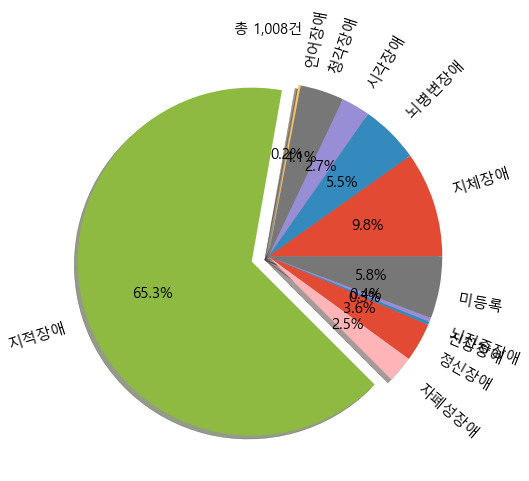

In [135]:
conn = pymysql.connect(host='localhost', user='root', password='0141',

db = 'disabled_M', charset='utf8')

cur = conn.cursor()
query = """
select d.유형별, d.건수(건) from 피해장애인_주장애유형 as d"""


cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

info_df1 = pd.DataFrame(rows) # DataFrame 형태로 변환
info_df1.columns = [desc[0][0],desc[1][0]]

cur.close()
conn.close()
info_df1.set_index('유형별', inplace=True)

exp = [0,0,0,0,0,0.1,0,0,0,0,0]
textprops = {'size': 15}
plt.figure(figsize=(15,8))
plt.pie(info_df1['건수(건)'], labels = info_df1['건수(건)'].index, explode=exp,autopct='%.1f%%', textprops=textprops, rotatelabels=True
        ,shadow=True)
plt.title('총 1,008건')
plt.show()

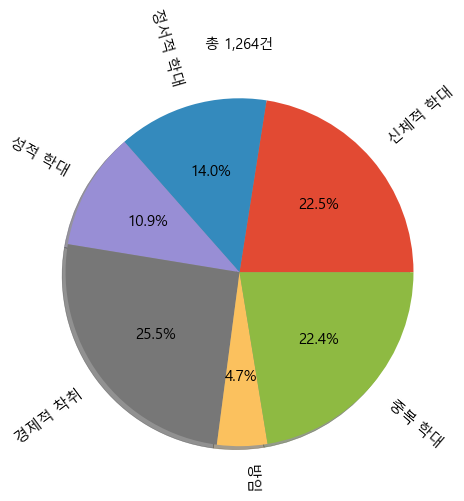

In [136]:
conn = pymysql.connect(host='localhost', user='root', password='0141',

db = 'disabled_M', charset='utf8')

cur = conn.cursor()
query = """
select * from 장애인학대유형 as d"""


cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

info_df5 = pd.DataFrame(rows) # DataFrame 형태로 변환
info_df5.columns = [desc[0][0],desc[1][0]]

cur.close()
conn.close()
info_df5.set_index('학대유형', inplace=True)

textprops = {'size': 15}
plt.figure(figsize=(15,8))
plt.pie(info_df5['건수'], labels = info_df5['건수'].index,autopct='%.1f%%', textprops=textprops, rotatelabels=True
        ,shadow=True)
plt.title('총 1,264건')
plt.show()

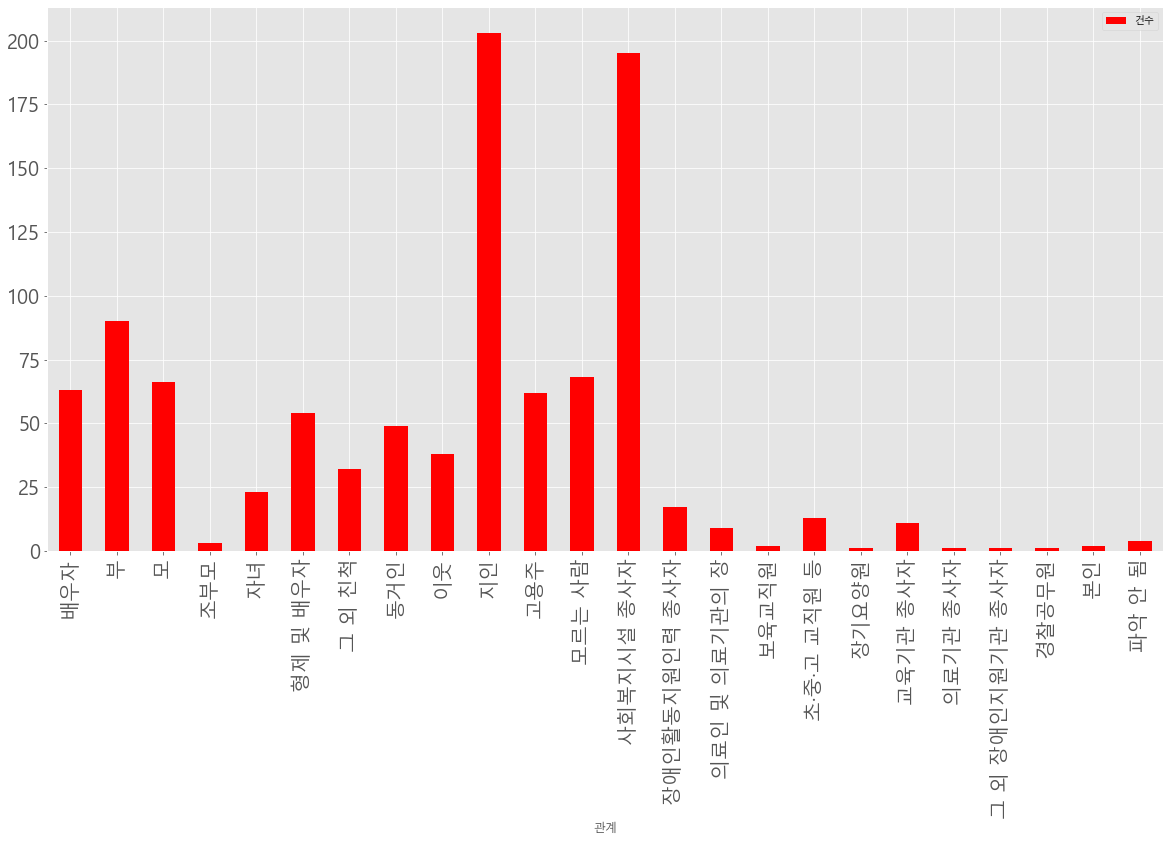

In [131]:
conn = pymysql.connect(host='localhost', user='root', password='0141',

db = 'disabled_M', charset='utf8')

cur = conn.cursor()
query = """
select d.관계, d.건수 from  관계 as d"""


cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

info_df2 = pd.DataFrame(rows) # DataFrame 형태로 변환
info_df2.columns = [desc[0][0],desc[1][0]]

cur.close()
conn.close()
info_df2.fillna(0,inplace=True)
info_df2.set_index('관계', inplace=True)
info_df2.plot.bar(figsize=(20,10), fontsize=20, color='red')
plt.style.use('ggplot')

<AxesSubplot:xlabel='범죄별'>

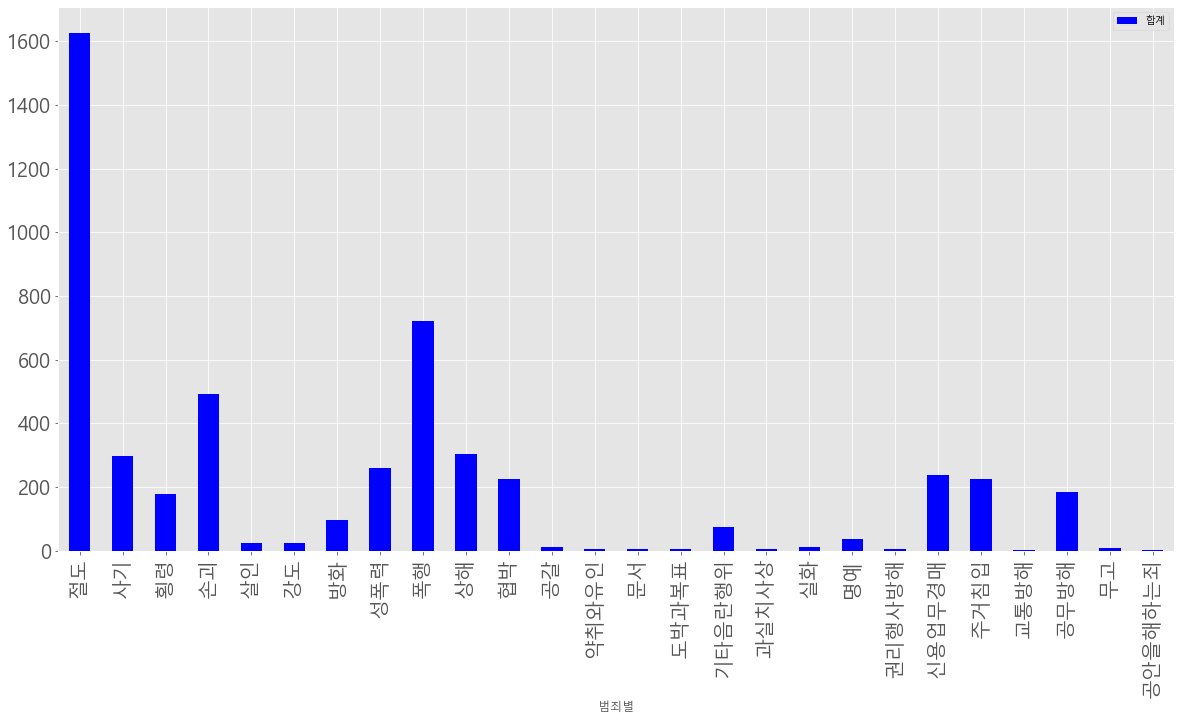

In [133]:
conn = pymysql.connect(host='localhost', user='root', password='0141',

db = 'disabled_M', charset='utf8')

cur = conn.cursor()
query = """
select 범죄별, 합계 from 정신장애범죄자_전과 as d"""


cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

info_df = pd.DataFrame(rows) # DataFrame 형태로 변환
info_df.columns = [desc[0][0],desc[1][0]]

cur.close()
conn.close()
info_df.fillna(0,inplace=True)
info_df.set_index('범죄별', inplace=True)
info_df.plot.bar(figsize=(20,10), fontsize=20, color='blue')

In [82]:
conn = pymysql.connect(host='localhost', user='root', password='0141',

db = 'disabled_M', charset='utf8')

cur = conn.cursor()
query = """
select gg.항목,gg.계 as 공공,mg.계 as 민간 from 공공_고용_현황 as gg      # 민간기업과 공공기업 고용 현황
                                                                        # 항목 컬럼 외래키 
                                                                        # join 통해 고용률 데이터 임포트
       join 민간_고용_현황 as mg
       on gg.항목 = mg.항목"""


cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

info_df3 = pd.DataFrame(rows) # DataFrame 형태로 변환
info_df3.columns = [desc[0][0],desc[1][0],desc[2][0]]

cur.close()
conn.close()
info_df3.iloc[0,1] = info_df3.iloc[0,1]+0.16
info_df3.iloc[4,1] = info_df3.iloc[4,1]+0.33
info_df3.iloc[8,1] = info_df3.iloc[8,1]+0.52
info_df3.iloc[0,2] = info_df3.iloc[0,2]+0.67
info_df3.iloc[4,2] = info_df3.iloc[4,2]+0.79
info_df3.iloc[8,2] = info_df3.iloc[8,2]+0.91
hiredf = info_df3.iloc[[0,4,8]]
hiredf
# plt.figure(figsize=(10,5))
# plt.plot(hiredf['항목'], hiredf['공공'])
# plt.plot(hiredf['항목'], hiredf['민간'])

,항목,공공,민간
0,18.고용률 (%),3.16,2.67
4,19.고용률 (%),3.33,2.79
8,20.고용률 (%),3.52,2.91


In [83]:
conn = pymysql.connect(host='localhost', user='root', password='0141',

db = 'disabled_M', charset='utf8')

cur = conn.cursor()
query = """
select * from 재산범죄3년"""


cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

info_df4 = pd.DataFrame(rows) # DataFrame 형태로 변환
info_df4.columns = [desc[0][0],desc[1][0]]
info_df4.set_index('년도',inplace=True)

In [105]:
newhiredf = hiredf.set_index('항목')

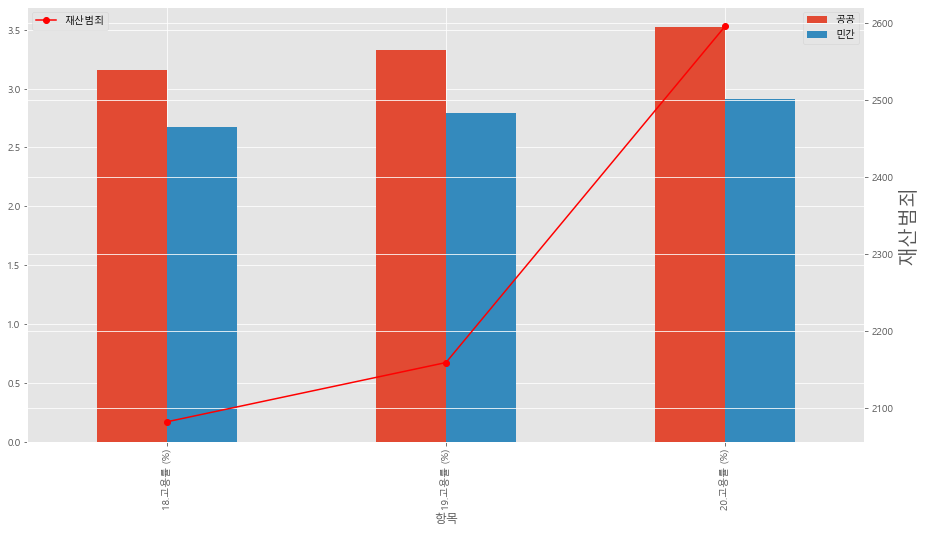

In [128]:
newhiredf.plot.bar(figsize=(15,8), fontsize=10)
y_right=plt.twinx()
y_right.plot(info_df4.values,label='재산범죄',color='red', marker='o')
plt.ylabel('재산범죄',size=20)
y_right.legend(loc=2)

<AxesSubplot:xlabel='지원유형'>

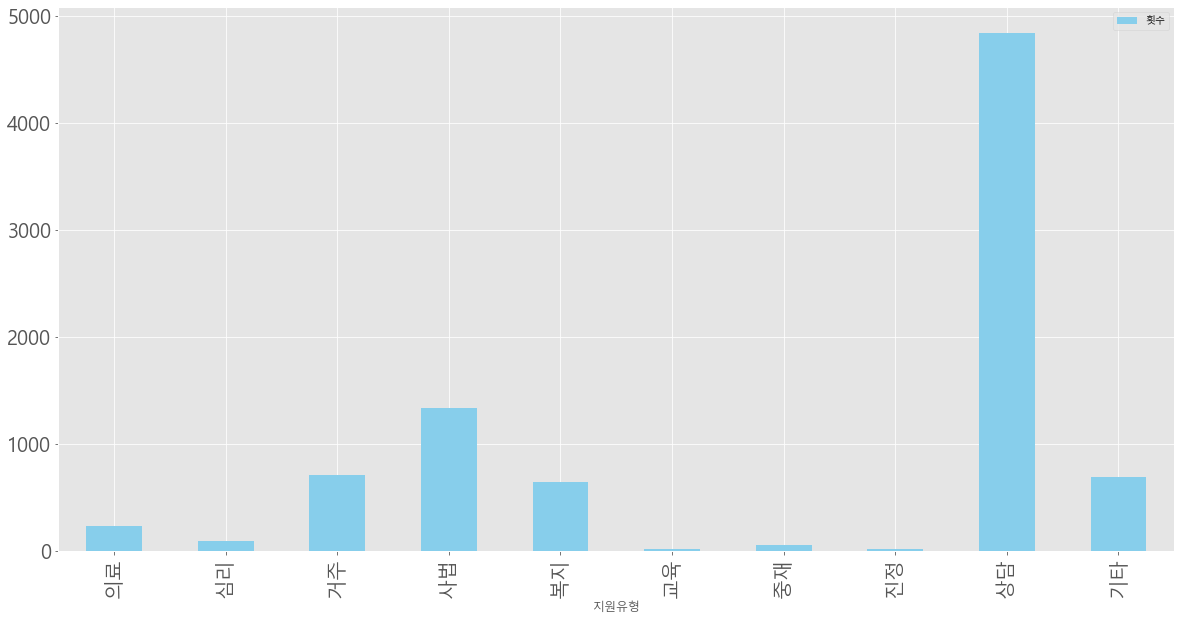

In [140]:
conn = pymysql.connect(host='localhost', user='root', password='0141',

db = 'disabled_M', charset='utf8')

cur = conn.cursor()
query = """
select * from 지원"""


cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

info_df5 = pd.DataFrame(rows) # DataFrame 형태로 변환
info_df5.columns = [desc[0][0],desc[1][0]]
info_df5.set_index('지원유형',inplace=True)
info_df5.plot.bar(figsize=(20,10), fontsize=20, color='skyblue')